## Домашнее задание №4 - Функции нескольких переменных

In [1]:
# Грузим библиотеки
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Задание 1. 

Постройте трехмерный график функции

$f(x)=x_2^2-x_1^2 x_2 + 2 x_1 x_2$

А также график линий уровня с уровнями {$1,5,10$}

In [79]:
# Для построения графика функции для начала определяем диапазон значений, для которых мы будем строить график.
# Предварительно выбранный диапазон -5:5, -5:5 показался не самым удачным и был заменен на -4:6 -5:5
delta=0.02
x1=np.arange(-4.0,6.0,delta)
x2=np.arange(-5.0,5.0,delta)
X1, X2 = np.meshgrid(x1,x2)
# Определяем формулу и вычисляем значения функции 
Z = X2**2 - X1**2*X2 + 2*X1*X2
# Смотрим данные:
X1, X2, Z

(array([[-4.  , -3.98, -3.96, ...,  5.94,  5.96,  5.98],
        [-4.  , -3.98, -3.96, ...,  5.94,  5.96,  5.98],
        [-4.  , -3.98, -3.96, ...,  5.94,  5.96,  5.98],
        ...,
        [-4.  , -3.98, -3.96, ...,  5.94,  5.96,  5.98],
        [-4.  , -3.98, -3.96, ...,  5.94,  5.96,  5.98],
        [-4.  , -3.98, -3.96, ...,  5.94,  5.96,  5.98]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        [-4.96, -4.96, -4.96, ..., -4.96, -4.96, -4.96],
        ...,
        [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
        [ 4.96,  4.96,  4.96, ...,  4.96,  4.96,  4.96],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98]]),
 array([[145.      , 144.002   , 143.008   , ..., 142.018   , 143.008   ,
         144.002   ],
        [144.3204  , 143.326392, 142.336368, ..., 141.350328, 142.336368,
         143.326392],
        [143.6416  , 142.651584, 141.665536, ..., 140.683456, 141.665536,
         142.651584]

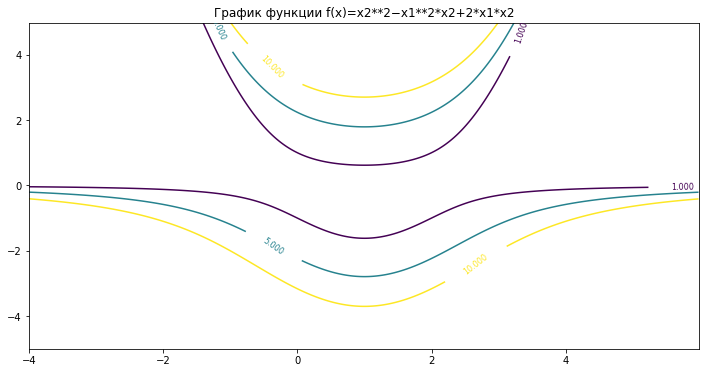

In [151]:
# Займемся отображением линий контура
fig, axis = plt.subplots()

# Задаем значения для линий контура.
task_levels = [1,5,10]
CS = axis.contour(X1,X2,Z, levels=task_levels)
axis.clabel(CS, inline=True, fontsize=8)
axis.set_title('График функции f(x)=x2**2−x1**2*x2+2*x1*x2')

fig.set_figwidth(12)    
fig.set_figheight(6) 
plt.show()

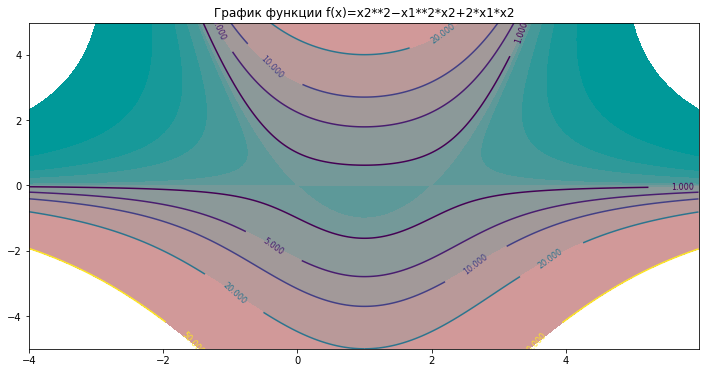

In [152]:
# Интереса ради то же самое попробуем отобразить с дополнительным закрашиванием областей между линиями
fig, axis = plt.subplots()

# Задаем значения для линий контура. Добавим еще несколько уровней
task_levels = [1,5,10,20,50]
CS = axis.contour(X1,X2,Z, levels=task_levels)
axis.clabel(CS,inline=True, fontsize=8)
axis.set_title('График функции f(x)=x2**2−x1**2*x2+2*x1*x2')

#  Задаем количество областей, перекрывающих область наших заданных линий:
lev_regions = [-50, -20, -10, -5, -1, 0, 1, 5, 10, 20, 50]
#  Задаем цвет каждой области:
color_fill = np.zeros((12, 3))
color_fill[:, 1:] = 0.6
color_fill[:, 0] = np.linspace(0, 1, 12)

axis.contourf(X1, X2, Z,
            levels = lev_regions,
            colors = color_fill)


fig.set_figwidth(12)    
fig.set_figheight(6) 
plt.show()

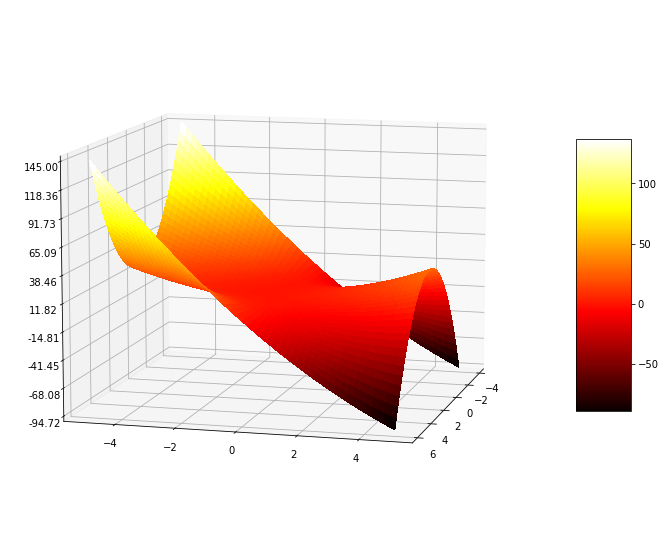

In [95]:
# А теперь попробуем тот же график построить с помощью другой библиотеки
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


# Параметры поверхности изменены по сравнению с примером из лекции. Цвета - спорные, но я так вижу :)
surf = ax.plot_surface(X1, X2, Z, cmap=cm.hot,
                       linewidth=1, antialiased=False)

# Значения границ отображения по оси Z подбирались по фактическому размаху данных.
ax.set_zlim(Z.min(), Z.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Этот набор параметров для точки наблюдателя кажется одним из самых наглядных 
ax.azim = 15
ax.dist = 10
ax.elev = 10

fig.set_figwidth(12)    
fig.set_figheight(10) 
plt.show()

### Задание 2.

Вычислить вектор градиента и матрицу Гессе для функции:

$f(x)=2x_1^3-3x_1 x_2+2x_2 x_3^2-x_2^3$

в точке $M=(2,1,1)$.

In [98]:
import sympy as sym

In [105]:
# Вначале определим все наши переменные и построим исходное выражение
# Переменные сразу упакуем в список чтобы автоматизировать последующие операции
XX = [sym.Symbol('x1'), sym.Symbol('x2'), sym.Symbol('x3')]
# Фактически далее будем обращаться к созданным символам следующим образом
# XX[0] <=> x1 
# XX[1] <=> x2 
# XX[2] <=> x3 

# Определяем функцию
fnc = 2*XX[0]**3-3*XX[0]*XX[1]+2*XX[1]*XX[2]**2-XX[1]**3
fnc

2*x1**3 - 3*x1*x2 - x2**3 + 2*x2*x3**2

In [109]:
# Для вычисления вектора градиента и матрицы Гессе в конкретной точке 
# вначале получим "заготовки" этих вектора и матрицы, содержащих формулы подсчитанных производных
grad = []
gesse = []
for var1 in XX:
    diff1 = sym.diff(fnc, var1)
    grad.append(diff1)
    gesse_row = []
    for var2 in XX:
        diff2 = sym.diff(diff1, var2)
        gesse_row.append(diff2)
    gesse.append(gesse_row)    

print(grad)
print(gesse)

[6*x1**2 - 3*x2, -3*x1 - 3*x2**2 + 2*x3**2, 4*x2*x3]
[[12*x1, -3, 0], [-3, -6*x2, 4*x3], [0, 4*x3, 4*x2]]


In [123]:
# Теперь пришла пора получить вектор градиента и матрицу Гессе для заданной точки M
M = [2,1,1]
grad_M = []
gesse_M = []

# Создаем словарь подстановок вида {x1: 2, x2: 1, x3: 1}
sbs = {}
for cnt0, m in enumerate(M):
    sbs[XX[cnt0]] = m
# print(sbs)

for cnt1, gr in enumerate(grad):
    grad_M.append(gr.subs(sbs).evalf()) 
    gesse_M_row = []
    for cnt2, gr2 in enumerate(gesse[cnt1]):
        gesse_M_row.append(gr2.subs(sbs).evalf())
    gesse_M.append(gesse_M_row)

print(grad_M)
print(gesse_M)

  

[21.0000000000000, -7.00000000000000, 4.00000000000000]
[[24.0000000000000, -3.00000000000000, 0], [-3.00000000000000, -6.00000000000000, 4.00000000000000], [0, 4.00000000000000, 4.00000000000000]]


In [124]:
# Теперь пришла пора получить вектор градиента и матрицу Гессе для заданной точки M
M = [2,1,1]

def calc_g_g_for_vector(Vec, Grad, Gesse):
    grad_M = []
    gesse_M = []

    # Создаем словарь подстановок вида {x1: 2, x2: 1, x3: 1}
    sbs = {}
    for cnt0, m in enumerate(Vec):
        sbs[XX[cnt0]] = m
    # print(sbs)

    for cnt1, gr in enumerate(Grad):
        grad_M.append(gr.subs(sbs).evalf()) 
        gesse_M_row = []
        for cnt2, gr2 in enumerate(Gesse[cnt1]):
            gesse_M_row.append(gr2.subs(sbs).evalf())
        gesse_M.append(gesse_M_row)
    return grad_M, gesse_M    

Grad_M, Gesse_M = calc_g_g_for_vector(M, grad, gesse)

print(Grad_M)
print(Gesse_M)

[21.0000000000000, -7.00000000000000, 4.00000000000000]
[[24.0000000000000, -3.00000000000000, 0], [-3.00000000000000, -6.00000000000000, 4.00000000000000], [0, 4.00000000000000, 4.00000000000000]]


### Задание 3.

Для функции из задания 2 с использованием критерия Сильвестра определить является ли матрица Гессе положительно определенной в точке $K=(2,-5,-3)$.



In [125]:
# Определим точку K
K = [2,-5,-3]

# Посчитаем для этой точки вектор градиента и матрицу Гессе с использованием определенной ранее функции
Grad_K, Gesse_K = calc_g_g_for_vector(K, grad, gesse)

print(Grad_K)
print(Gesse_K)

[39.0000000000000, -63.0000000000000, 60.0000000000000]
[[24.0000000000000, -3.00000000000000, 0], [-3.00000000000000, 30.0000000000000, -12.0000000000000], [0, -12.0000000000000, -20.0000000000000]]


In [143]:
# Теперь для вычисленной матрицы Гессе будем считать определители. Предварительно преобразуем массив в матрицу numpy
Gesse_K_np = np.matrix(Gesse_K, dtype=float)
Gesse_K_np
from numpy import linalg as LA
LA.det(Gesse_K_np)

-17675.999999999996

In [146]:
# Определяем флаг того, что матрица Гессе положительно определена, исходя из презумпции положительности :)
matrix_is_positive = True
i = 1
while i <= len(K):
    Gesse_minor = Gesse_K_np[:i, :i]
    print(f'Минор {i} матрицы Гессе:\n{Gesse_minor}')
    print(f'Её определитель:\n{np.linalg.det(Gesse_minor)}\n')
    if np.linalg.det(Gesse_minor) < 0:
        matrix_is_positive = False
        break
    i +=1
    
if matrix_is_positive:
    print('Матрица Гессе для точки К является положительно определенной')
else:
    print('Матрица Гессе для точки К оказалась не такой уж положительной')

Минор 1 матрицы Гессе:
[[24.]]
Её определитель:
24.000000000000004

Минор 2 матрицы Гессе:
[[24. -3.]
 [-3. 30.]]
Её определитель:
710.9999999999998

Минор 3 матрицы Гессе:
[[ 24.  -3.   0.]
 [ -3.  30. -12.]
 [  0. -12. -20.]]
Её определитель:
-17675.999999999996

Матрица Гессе для точки К оказалась не такой уж положительной
